In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x=np.linspace(0,50, 501)

In [3]:
y=np.sin(x)

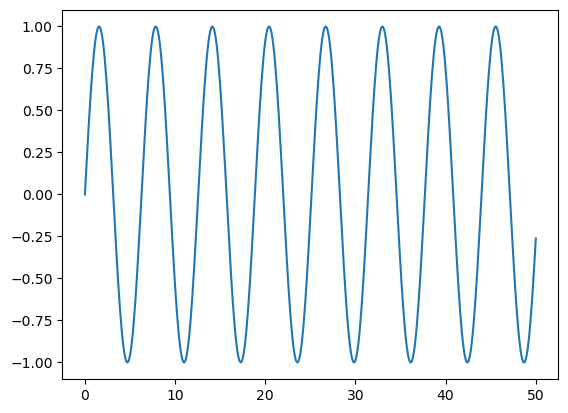

In [4]:
plt.plot(x,y)

In [5]:
df=pd.DataFrame(data=y, index=x, columns=[['sine']])

In [6]:
test_percent=0.1
test_point=np.round(len(df)*test_percent)
test_index=int(len(df)-test_point)
test_index

451

In [7]:
train=df.iloc[:test_index]
test=df.iloc[test_index:]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test)

In [9]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [10]:
length=50
batch_size=1
generator=TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [12]:
#RNN using Simple RNN
n_features=1
model=Sequential()
model.add(SimpleRNN(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(generator, epochs=5)

C:\Users\yrupa\anaconda3\envs\py3124\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
  5/401 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0782 

C:\Users\yrupa\anaconda3\envs\py3124\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


401/401 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.0305
Epoch 2/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 7.2907e-05
Epoch 3/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 5.7905e-05
Epoch 4/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 3.8150e-04
Epoch 5/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 3.1226e-05


<Axes: >

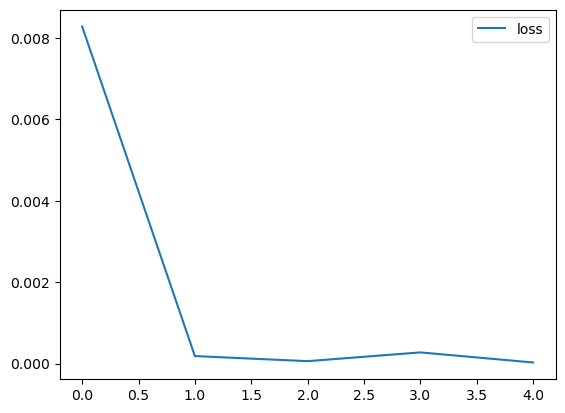

In [13]:
loss=pd.DataFrame(model.history.history)
loss.plot()

In [14]:
#predict test series and comapre with actual test
test_pred=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1, length, n_features))
for i in range (len(test)):
 current_pred=model.predict(current_batch)[0]
 test_pred.append(current_pred)
 current_batch=np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━

In [15]:
true_pred=scaler.inverse_transform(test_pred)

In [16]:
type(true_pred)

numpy.ndarray

In [17]:
test['prediction']=true_pred

C:\Users\yrupa\AppData\Local\Temp\ipykernel_17248\654341122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']=true_pred


<Axes: >

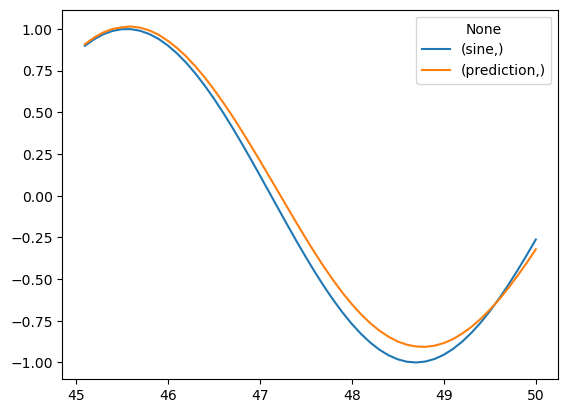

In [19]:
test.plot()

In [20]:
#using LSTM and EarlyStop
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss', patience=2)

In [21]:
#the scaled_test data has only 50 points. So to check the prediction and other metrics we wont have any data point to comparre and validate if lenght=50. SO take 1 data point less
validation_generator=TimeseriesGenerator(scaled_test, scaled_test, length=49, batch_size=1)

In [23]:
model=Sequential()
model.add(LSTM(50, input_shape=(49, n_features)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(generator, epochs=20, callbacks=[early_stop], validation_data=validation_generator)

Epoch 1/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - loss: 0.0706 - val_loss: 7.4075e-05
Epoch 2/20
  4/401 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 1.8832e-04 

C:\Users\yrupa\anaconda3\envs\py3124\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


401/401 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 3.2106e-04 - val_loss: 1.3361e-07
Epoch 3/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 1.1562e-04 - val_loss: 3.5692e-05
Epoch 4/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 1.0524e-04 - val_loss: 9.5880e-07


In [29]:
#predict test series and comapre with actual test
test_pred=[]
first_eval_batch=scaled_train[-49:]
current_batch=first_eval_batch.reshape((1, 49, n_features))
for i in range (50):
 current_pred=model.predict(current_batch)[0]
 test_pred.append(current_pred)
 current_batch=np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━

In [30]:
true_pred=scaler.inverse_transform(test_pred)

In [31]:
test['lstm pred']=true_pred

C:\Users\yrupa\AppData\Local\Temp\ipykernel_17248\3724504295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['lstm pred']=true_pred


In [32]:
test

,sine,prediction,lstm pred
45.1,0.899097,0.908059,0.914597
45.2,0.938307,0.948314,0.952045
45.3,0.968142,0.979379,0.979801
45.4,0.988304,1.000182,0.997338
45.5,0.998591,1.009848,1.004363
45.6,0.998900,1.014980,1.000807
45.7,0.989229,1.007825,0.986783
45.8,0.969673,0.991315,0.962558
45.9,0.940429,0.966005,0.928516
46.0,0.901788,0.929540,0.885134


<Axes: >

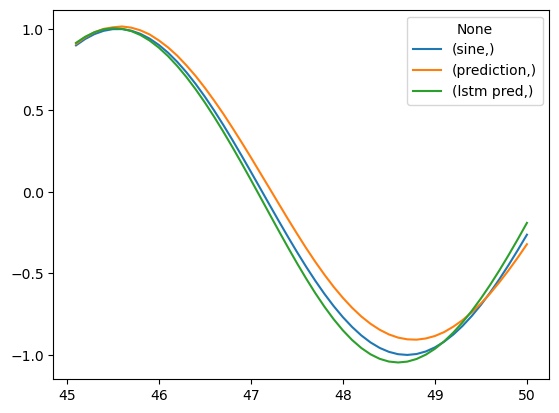

In [33]:
test.plot()

In [35]:
#forecast into unkonow future
full_scaler=MinMaxScaler()
scaled_data=full_scaler.fit_transform(df)

In [36]:
full_generator=TimeseriesGenerator(scaled_data, scaled_data, length=50, batch_size=1)

In [45]:
model=Sequential()
model.add(LSTM(50, input_shape=(50, n_features)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(full_generator, epochs=8)

Epoch 1/8


C:\Users\yrupa\anaconda3\envs\py3124\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  7/451 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.4413 

C:\Users\yrupa\anaconda3\envs\py3124\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


451/451 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 0.0438
Epoch 2/8
451/451 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 1.0026e-04
Epoch 3/8
451/451 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.0010
Epoch 4/8
451/451 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 8.1614e-05
Epoch 5/8
451/451 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 8.2736e-05
Epoch 6/8
451/451 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 3.6268e-04
Epoch 7/8
451/451 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 3.3920e-05
Epoch 8/8
451/451 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 3.8558e-04


<Axes: >

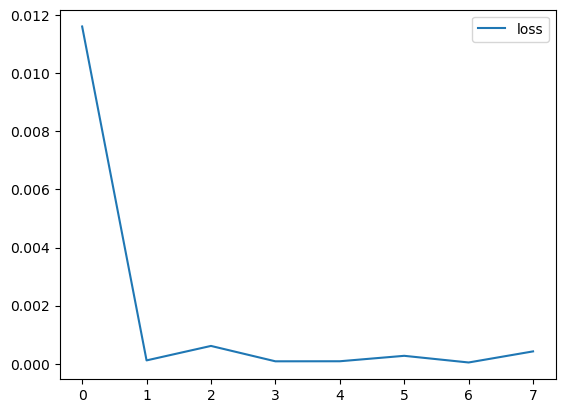

In [46]:
loss=pd.DataFrame(model.history.history)
loss.plot()

In [47]:
#predict test series and comapre with actual test
pred=[]
first_eval_batch=scaled_data[-50:]
current_batch=first_eval_batch.reshape((1, 50, n_features))
for i in range (20):
 current_pred=model.predict(current_batch)[0]
 pred.append(current_pred)
 current_batch=np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [48]:
forecast=full_scaler.inverse_transform(pred)

In [49]:
forecast_index=np.arange(50.1, 52.1, 0.1)

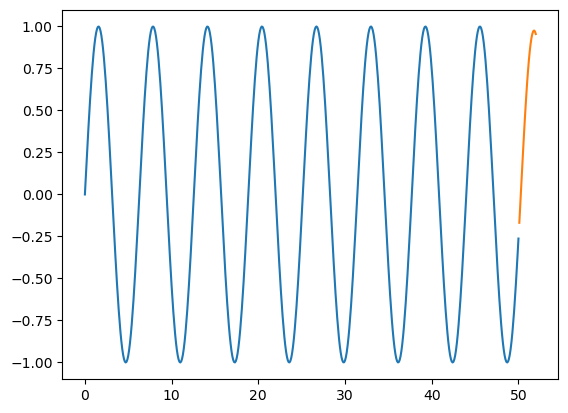

In [50]:
plt.plot(df.index, df['sine'])
plt.plot(forecast_index, forecast)